# Detection of Sources 

### By Sergio Daniel Hernandez Charpak

## Detection of Sources on the simulated images using the sep library

Importing the libraries

In [20]:
%pylab inline
import sep #http://sep.readthedocs.org/
import os 
from astropy.io import fits
import numpy as np
import glob

Populating the interactive namespace from numpy and matplotlib


We now define the path were the image is.

In [3]:
path_image_1 = 'Images/test.jpg'

In [4]:
imagen_1 = pylab.imread(path_image_1)
print shape(imagen_1)

(256, 256)


With the data loaded and its shape verified we can now visualized this image.

<matplotlib.colorbar.Colorbar instance at 0x7f67fd7e0488>

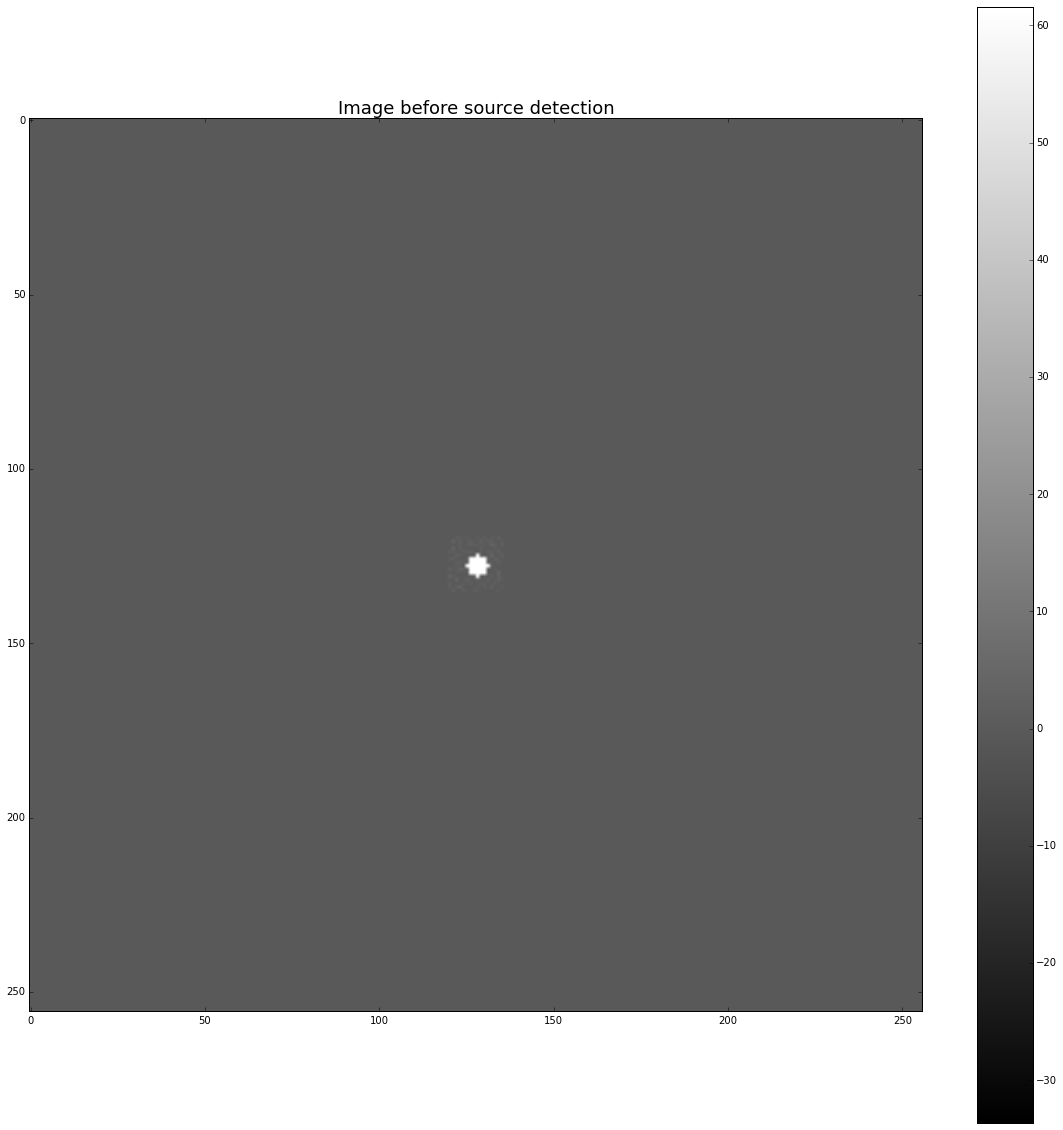

In [5]:
figure(figsize = (20,20))
imshow(imagen_1, cmap='gray', vmin=-33.627594,vmax=61.58709)
title("Image before source detection", fontsize=18)
colorbar()

We can see one source in this image.

In [23]:
data=imagen_1
shape_data=shape(data)
print type(data[0,0])
data_double = data.astype(float)
print type(data_double[0,0])

<type 'numpy.uint8'>
<type 'numpy.float64'>


We proceed now to use the sep library. 
We first need to extract the background of the image.

In [24]:
#Background
try:
    bkg = sep.Background(data_double)
except ValueError:
    data_double = data.byteswap().newbyteorder()
    bkg = sep.Background(data_double)

We now use sep to detect the sources. Here there is a "magical" number. The 2.0 used to get the threshold is a number that can change depending on the context.

In [25]:
#Source detection

thresh = 2.0 * bkg.globalrms
objects = sep.extract(data_double, thresh) # objects is a numpy structured array

num_objects = len(objects)
print num_objects # number of objects

1


we can now see that sep detected 1 sources in the image. We now proceed to observe which information is stored in the numpy structured array <i>objects</i>

In [26]:
#Result information
print(objects.dtype.names)

('thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'x2', 'y2', 'xy', 'a', 'b', 'theta', 'cxx', 'cyy', 'cxy', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak', 'xpeak', 'ypeak', 'flag')


We will now extract the coordinates of each source, which means that we will extract the 'x' and 'y' data and save it into one array each.

In [27]:
objects_x = []
objects_y = []

for i in range(num_objects):
    x = objects['x'][i]
    y = objects['y'][i]
    
    objects_x.append(x)
    objects_y.append(y)
    
objects_x = array(objects_x)
objects_y = array(objects_y)

Once we have the coordinates of the sources we can now proceed in visualizing them with the original image. For each source we draw a cross in the image.

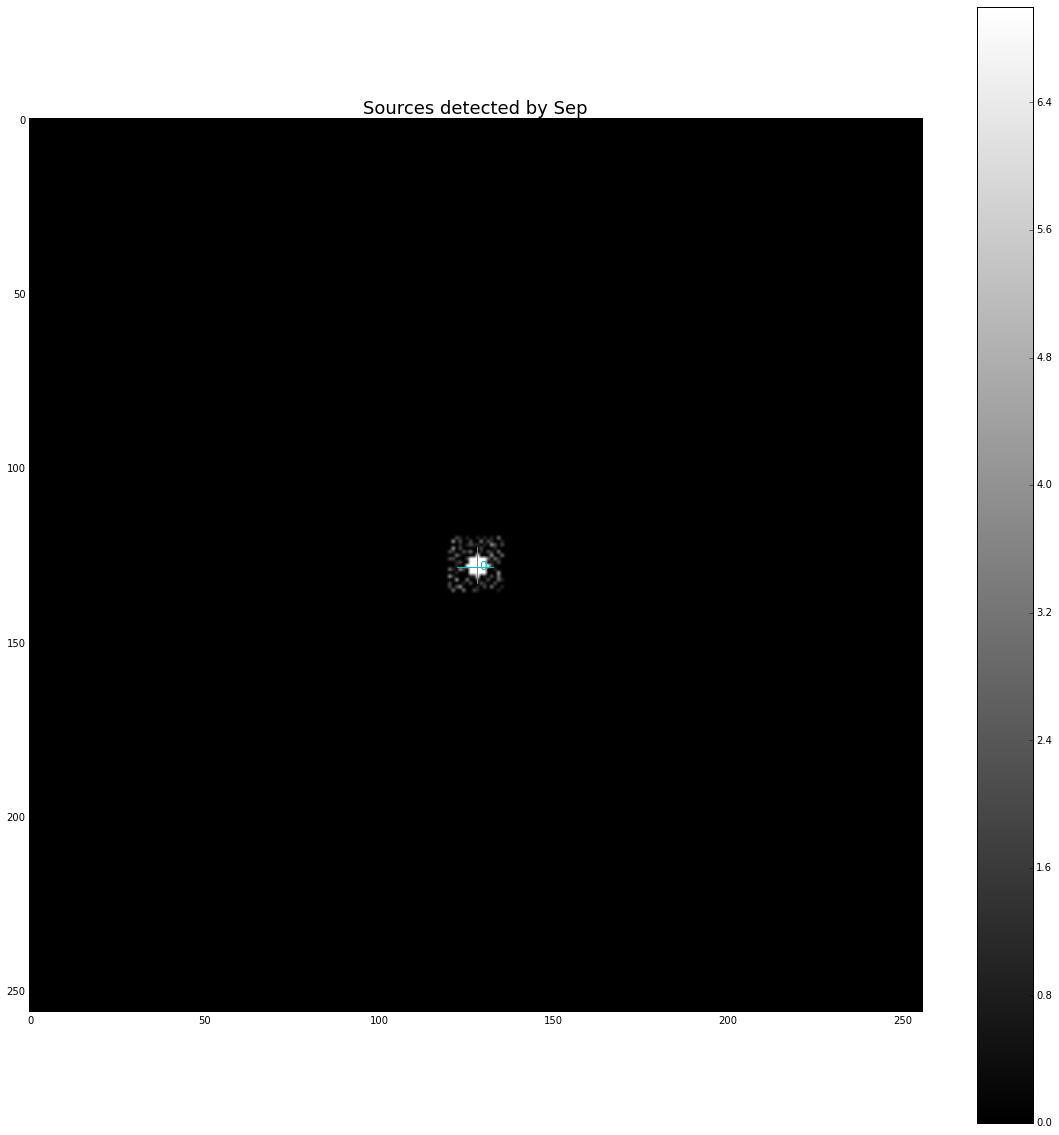

In [28]:
x_max = shape_data[0]
y_max = shape_data[1]

fig = figure(figsize=(20,20))
imshow(data, cmap='gray',vmin=0,vmax=7)
title("Sources detected by Sep", fontsize=18)
colorbar()

for i in range(len(objects)):
    x = objects_x[i]
    y = objects_y[i]
    
    porc_x = x/float(x_max)
    porc_y = 1-y/float(y_max)
    
    axvline(x,porc_y-0.02,porc_y+0.02,c='c')
    axhline(y,porc_x-0.02,porc_x+0.02,c='c') 
    text(x+1,y+1,str(i),color='c',fontsize=12)
    

#Curves over sources

<p>To get the profiles of intensity of the sources we "draw" a line horizontaly centered in the source and get the intensity of each pixel in that line. </p>

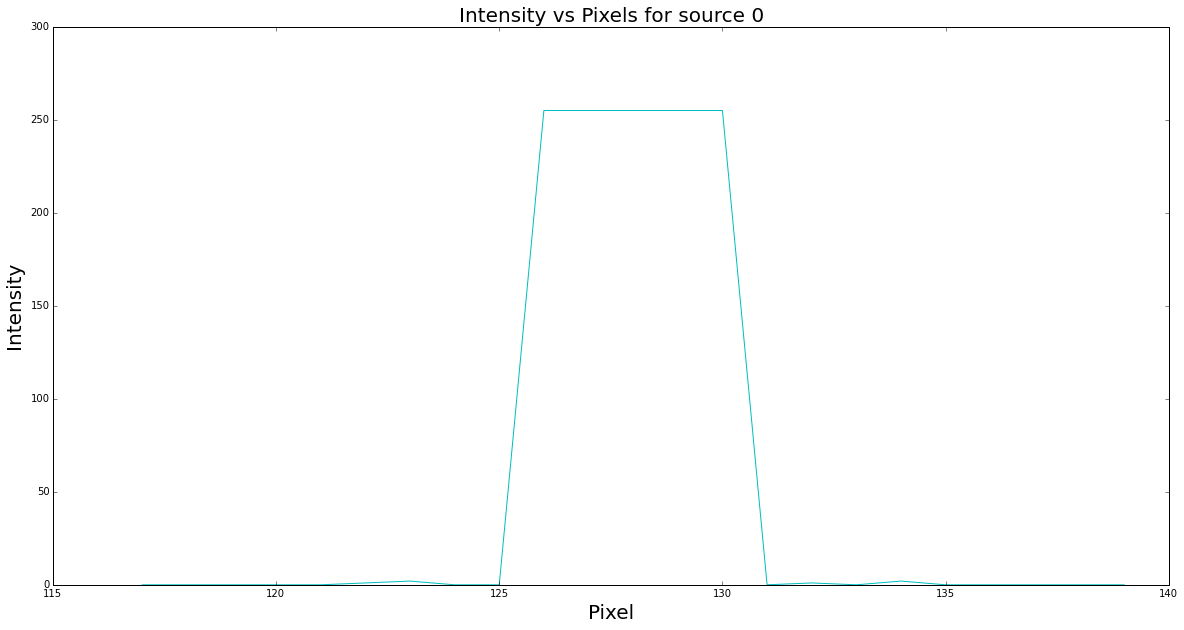

In [31]:
common_objects_x_int = array([int(ox) for ox in objects_x])
common_objects_y_int = array([int(oy) for oy in objects_y])
for i in range(len(objects)):

    row = common_objects_x_int[i]
    column = common_objects_y_int[i]
    
    array_pixels = zeros(23)
    array_intensity = zeros(23)
    index_arrays = 0
    
    if (row-12 < 0):
        for lin in range(0,row+11+1):
            pixel = data[lin][column]
            array_pixels[index_arrays] = lin
            array_intensity[index_arrays] = pixel
            index_arrays += 1
            
    elif (row+12 > shape_data[1]):
        for lin in range(row-11,shape_data[1]):
            pixel = data[lin][column]
            array_pixels[index_arrays] = lin
            array_intensity[index_arrays] = pixel
            index_arrays += 1

    else:
        for lin in range(row-11,row+11+1):
            try:
                pixel = data[column][lin]
                array_pixels[index_arrays] = lin
                array_intensity[index_arrays] = pixel
                index_arrays += 1
            except Exception:
                print shape(data), shape(array_pixels), shape(array_intensity)
                print lin, column, row, index_arrays
    
    
    fig = figure(figsize=(20,10))
    plot(array_pixels,array_intensity,c='c')
    xlabel('Pixel',fontsize=20)
    ylabel('Intensity',fontsize=20)
    title('Intensity vs Pixels for source '+str(i),fontsize=20)
    name_stripped = path_image_1.strip('.png')
    plt.savefig(name_stripped+'_sources_'+str(i)+'.png')
